In [2]:
from base_import import *

In [2]:
df = pd.read_csv('Data/Real_estate.csv')

In [4]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

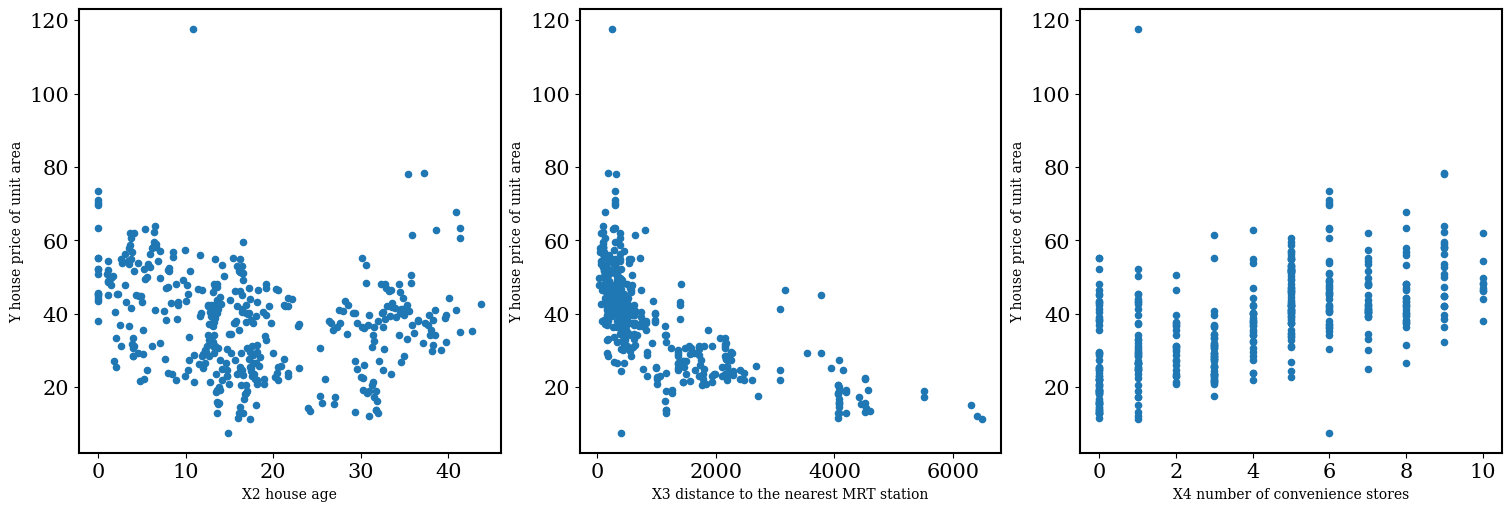

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5), constrained_layout = True)

df.plot(x = 'X2 house age', y = 'Y house price of unit area', kind = 'scatter', ax = ax[0])
df.plot(x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area', kind = 'scatter', ax = ax[1])
df.plot(x = 'X4 number of convenience stores', y = 'Y house price of unit area', kind = 'scatter', ax = ax[2])

In [15]:
def generate_model(X, Y, order):

    x_array = np.linspace(X.min(), X.max(), 1000)

    coeffs = np.polyfit(X, Y, order)

    model = np.poly1d(coeffs)

    y_array = model(x_array)

    return x_array, y_array

In [9]:
coeffs = np.polyfit(df['X2 house age'], df['Y house price of unit area'], 1)
y_1  = np.poly1d(coeffs)

In [20]:
X1, Y1 = generate_model(df['X2 house age'], df['Y house price of unit area'], 2)
X2, Y2 = generate_model(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'], 1)
X3, Y3 = generate_model(df['X4 number of convenience stores'], df['Y house price of unit area'], 1)

In [22]:
X2 = 'X2 house age'
X3 = 'X3 distance to the nearest MRT station'
X4 = 'X4 number of convenience stores'
Y = 'Y house price of unit area'

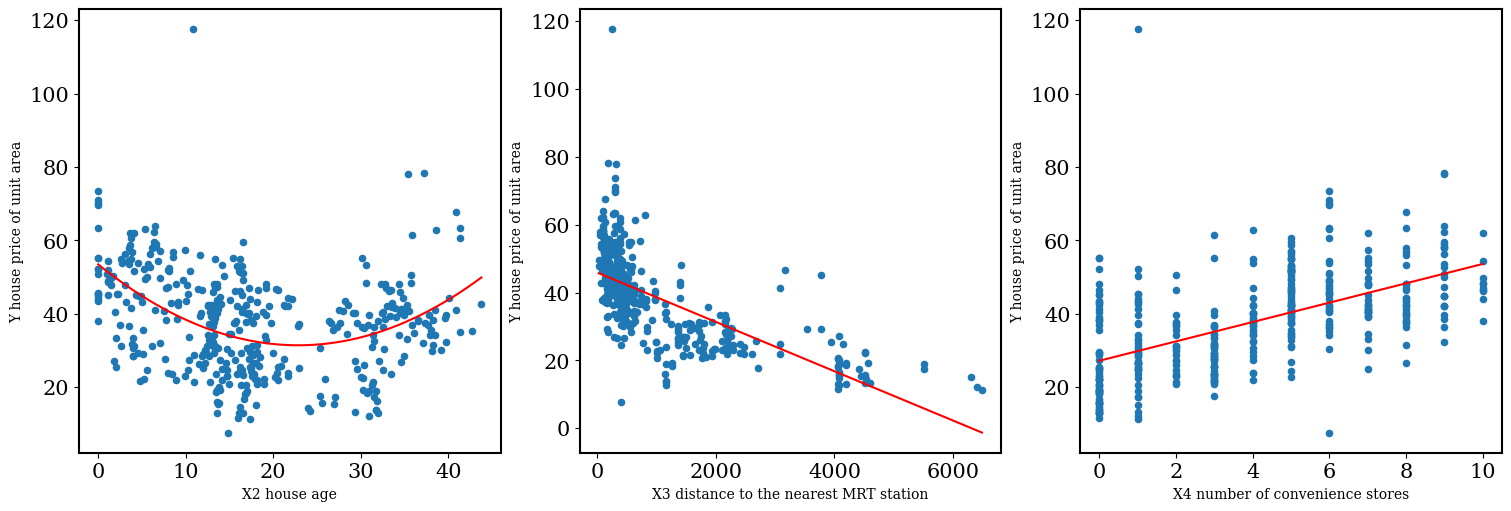

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5), constrained_layout = True)

df.plot(x = 'X2 house age', y = 'Y house price of unit area', kind = 'scatter', ax = ax[0])
ax[0].plot(X1, Y1, color = 'red')
df.plot(x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area', kind = 'scatter', ax = ax[1])
ax[1].plot(X2, Y2, color = 'red')
df.plot(x = 'X4 number of convenience stores', y = 'Y house price of unit area', kind = 'scatter', ax = ax[2])
ax[2].plot(X3, Y3, color = 'red')


In [39]:
def fitting_1d_KNN(X, Y, n_neighbors):
    
    x_fine = np.linspace(X.min(), X.max(), 1000)

    transform_x = X.reshape(-1, 1)
    transform_y = Y.reshape(-1, 1)

    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(transform_x, transform_y)

    y_fine = knn_regressor.predict(x_fine.reshape(-1, 1))

    return x_fine, y_fine.flatten()

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(df[X2].to_numpy().reshape(-1, 1), df[Y].to_numpy().reshape(-1, 1))

KNeighborsRegressor()

In [50]:
k = 25
x, y = fitting_1d_KNN(df[X2].to_numpy(), df[Y].to_numpy(), k)

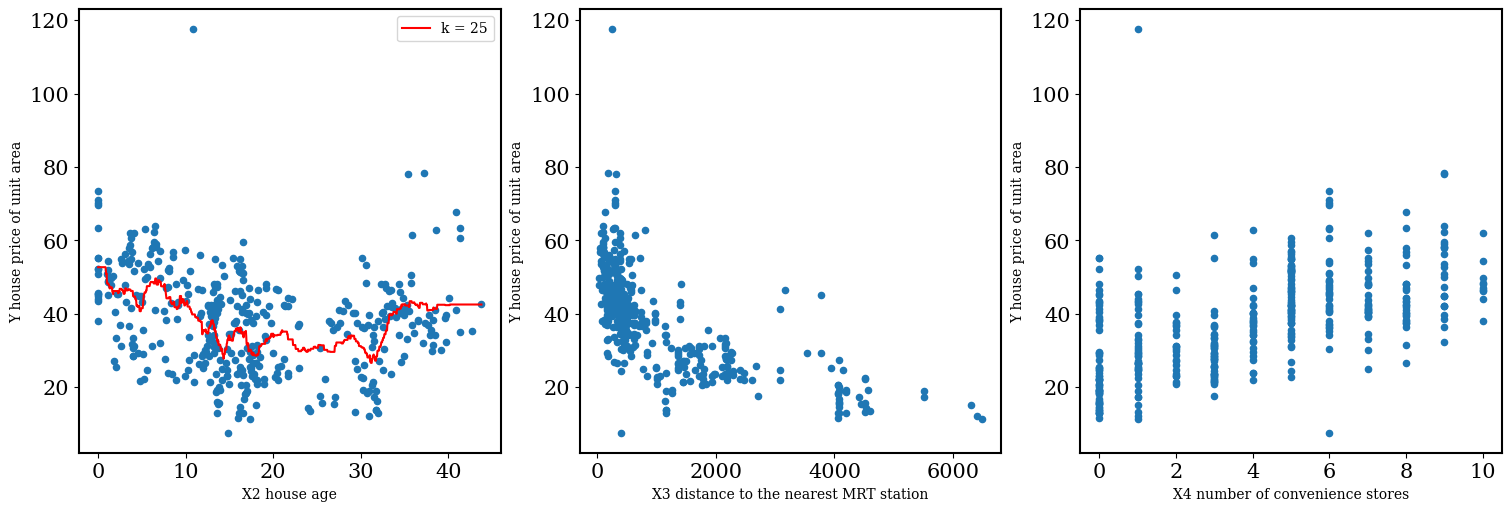

In [51]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5), constrained_layout = True)

df.plot(x = 'X2 house age', y = 'Y house price of unit area', kind = 'scatter', ax = ax[0])
ax[0].plot(x.flatten(), y.flatten(), color = 'red', label = f'k = {k}')
df.plot(x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area', kind = 'scatter', ax = ax[1])
#ax[1].plot(X2, Y2, color = 'red')
df.plot(x = 'X4 number of convenience stores', y = 'Y house price of unit area', kind = 'scatter', ax = ax[2])
#ax[2].plot(X3, Y3, color = 'red')
ax[0].legend()

In [53]:
pd.read_csv('../Talk_Analysis/Features_with_Continuum.txt', sep = ' ', index_col = 0)

,burst,ID,delayed:age,delayed:massformed,delayed:metallicity,delayed:tau,dust:Av,nebular:logU,redshift,stellar_mass,formed_mass,sfr,ssfr,nsfr,mass_weighted_age,tform,tquench,mass_weighted_zmet,chisq_phot,continuum
0,0.16,1027417,0.05120,7.72677,0.78019,7.37521,0.07321,-1.74790,3.19207,7.66001,7.72677,0.53460,-7.95087,1.28512,0.01717,1.93898,99.00000,0.77925,27.14090,7.132300e-20
1,0.30,1027604,0.01102,7.79865,1.87093,7.47210,0.01963,-1.06256,3.97953,7.77715,7.79865,0.63081,-7.97680,1.18461,0.00379,1.52122,99.00000,1.86581,167.68904,1.376300e-19
2,0.30,1027974,0.01033,7.84482,0.29784,7.03873,0.01079,-1.54053,2.94568,7.83019,7.84482,0.70157,-7.98437,1.33485,0.00356,2.15204,99.00000,0.29773,108.17118,3.892700e-19
3,-0.02,1028036,3.64934,11.43253,0.02483,0.42587,1.37751,-3.70101,1.58959,11.13510,11.43253,1.23784,-11.04228,-1.73521,2.80284,1.23649,2.96778,0.02492,51.33311,2.213600e-20
4,0.01,1028386,1.09516,9.79535,0.03001,8.18932,0.05456,-2.66407,2.64707,9.61301,9.79535,10.03270,-8.60023,0.60068,0.37685,2.04172,99.00000,0.03017,481.27102,1.337300e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11857,0.01,971708,0.94206,10.02163,0.76808,8.30784,0.31078,-2.00281,2.79713,9.85640,10.02163,20.18290,-8.55017,0.63900,0.32272,1.95649,99.00000,0.76902,29.39977,8.987100e-19
11858,0.30,972102,0.01031,7.65270,0.44719,6.68903,0.59948,-2.77408,1.73002,7.63774,7.65270,0.45077,-7.98369,1.56953,0.00356,3.69697,99.00000,0.44694,175.59913,2.867300e-19
11859,0.01,973114,0.88208,9.91264,0.50534,8.20900,0.14328,-1.51116,2.81326,9.74898,9.91264,17.08967,-8.52625,0.66479,0.30253,1.96447,99.00000,0.50594,47.69493,1.214700e-18
11860,0.30,973145,0.01010,10.25300,1.97982,7.78900,0.89907,-1.01690,3.99843,10.23229,10.25300,179.57819,-7.97833,1.18215,0.00349,1.51321,99.00000,1.97536,588.94464,3.837400e-18


In [54]:
pd.read_csv('../Talk_Analysis/Predictions_with_Continuum.txt', sep = ' ', index_col = 0)

,Phot_ID,HDR_ID,flux_line,flux_line_err,sn,sn_err,Lya_z,EW,EW_r
0,1027417,3012769116,1.449000e-16,3.030000e-17,5.18,0.47,3.124309,2031.602709,492.592205
1,1027604,3012793567,8.370000e-17,1.230000e-17,5.17,0.52,3.177795,608.152292,145.567785
2,1027974,3012793341,1.801000e-16,1.890000e-17,8.63,0.56,2.370520,462.660878,137.266918
3,1028036,3012793592,8.860000e-17,1.610000e-17,4.81,0.49,2.890776,4002.529816,1028.722705
4,1028386,3012804619,2.427302e-16,5.249791e-17,4.87,0.52,1.958352,181.507650,61.354309
...,...,...,...,...,...,...,...,...,...
11857,971708,3001453381,1.228000e-16,1.280000e-17,7.97,0.53,2.759721,136.640284,36.343200
11858,972102,3001451832,1.874213e-16,3.069234e-17,5.16,0.48,1.975232,653.650786,219.697447
11859,973114,3001451927,1.357000e-16,1.250000e-17,9.68,0.51,2.814982,111.714827,29.283183
11860,973145,3001453748,8.030000e-17,1.710000e-17,5.61,0.52,2.203814,20.925627,6.531474


In [3]:
df = pd.read_csv('Data/Real_estate.csv')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X = df[['X2 house age']]
Y = df['Y house price of unit area']

In [12]:
linReg = LinearRegression()
linReg.fit(X, Y)

LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [13]:
np.sqrt(mean_squared_error(Y, linReg.predict(X)))

13.285348095978287

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [14]:
X = df[['X3 distance to the nearest MRT station']]
Y = df['Y house price of unit area']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

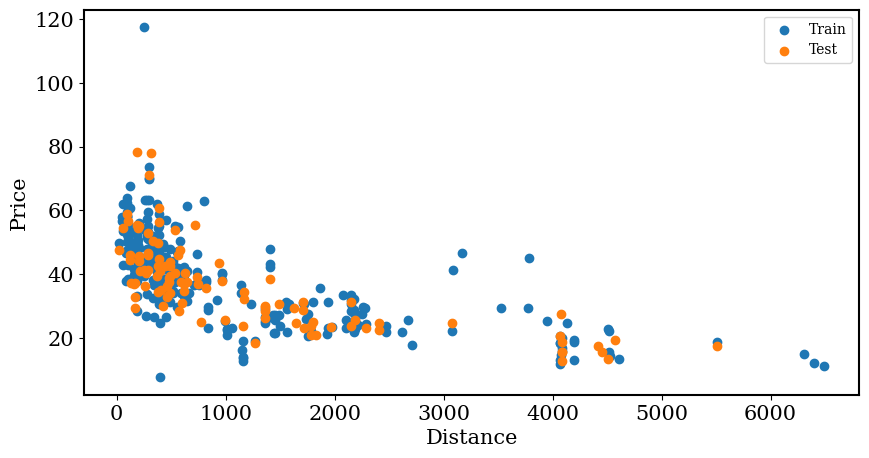

In [20]:
plt.figure(figsize = (10, 5))
plt.scatter(X_train, Y_train, label = 'Train')
plt.scatter(X_test, Y_test, label = 'Test')
plt.xlabel('Distance', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.legend()
plt.show()

In [30]:
#code for the linear regression model
reg = LinearRegression()
reg.fit(X_train, Y_train)
mean_squared_error(Y_test, reg.predict(X_test))

87.46250320984508

In [ ]:
#code for the second order linear regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) #defining the polynomial we are trying to fit
poly_features = poly.fit_transform(X_train.to_numpy().reshape(-1, 1)) #we need to reshape the data to fit the model


In [35]:
X_train.shape

(310, 1)

In [29]:
#code for the second order linear regression model
poly_reg_model = LinearRegression() #generating another variable to hold the polynomial linear regression
poly_reg_model.fit(poly_features, Y_train) #we fit the model with the polynomial features
poly_x_test = poly.fit_transform(X_test.to_numpy().reshape(-1, 1)) #we need to reshape the data to fit the model
mean_squared_error(Y_test, poly_reg_model.predict(poly_x_test)) #computing the mean squared error


72.34642208975997

In [31]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=15)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy().reshape(-1, 1), Y.to_numpy().reshape(-1, 1), test_size = 0.25)
knn_regressor.fit(X_train, Y_train)
y_pred = knn_regressor.predict(X_test)
mean_squared_error(Y_test, y_pred)

64.19612136752139

In [ ]:
def fitting_polynomial_regression(degree, X, Y):

    if X.shape[-1] != 1:
        X = X.reshape(-1, 1)
    
    if Y.shape[-1] != 1:
        Y = Y.reshape(-1, 1)

    poly = PolynomialFeatures(degree=degree, 
                              include_bias=False)
    
    poly_features = poly.fit_transform(X)
    
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, Y_train) #we fit the model with the polynomial features
    


In [40]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [41]:
X = df[['X3 distance to the nearest MRT station']]
X2 = df[['X4 number of convenience stores']]
Y = df['Y house price of unit area']

In [44]:
reg1 = LinearRegression()
reg1.fit(X, Y)

LinearRegression()

In [45]:
print(reg1.coef_, reg1.intercept_)

[-0.00726205] 45.851427057774984


In [46]:
reg2 = LinearRegression()
reg2.fit(X2, Y)

LinearRegression()

In [47]:
print(reg2.coef_, reg2.intercept_)

[2.63765346] 27.181104781472428


In [48]:
import statsmodels.api as sm

NameError: name 'alpha' is not defined

In [49]:
alpha = 0.05
X = df[['X3 distance to the nearest MRT station']]
Y = df['Y house price of unit area']
lr = sm.OLS(Y, sm.add_constant(X)).fit()
conf_interval = lr.conf_int(alpha)

Type:        float64
String form: 3097.1241528081923
File:        ~/anaconda3/envs/research/lib/python3.12/site-packages/numpy/__init__.py
Docstring:  
Double-precision floating-point number type, compatible with Python `float`
and C ``double``.

:Character code: ``'d'``
:Canonical name: `numpy.double`
:Alias: `numpy.float_`
:Alias on this platform (Darwin x86_64): `numpy.float64`: 64-bit precision floating-point number type: sign bit, 11 bits exponent, 52 bits mantissa.

In [50]:
conf_interval

,0,1
const,44.568565,47.134289
X3 distance to the nearest MRT station,-0.008034,-0.006490


In [52]:
masses = np.random.uniform(0.1, 100, 50)

In [55]:
np.random.uniform(0.1, 100, 50)

array([31.42312766, 96.90209002, 17.2361779 , 94.73660294, 46.70433579,
        9.48764502, 77.77837304, 29.85134501, 67.78151687,  6.25047787,
       69.80606396, 36.21623738, 67.63232865, 20.20777879, 43.71202873,
       23.35324741,  6.81159285, 28.08383367, 52.15685214,  4.10607089,
       50.38918804, 50.5598191 , 54.26673137, 93.70897346, 62.06155198,
       29.30906003, 62.2432649 , 34.57855359, 31.69960678, 16.58323628,
       61.91157772,  8.75657443, 59.11136791, 74.84493934, 24.02726932,
       93.73639681, 37.03442779, 55.40875313, 44.99089992, 52.13145679,
       99.76970177, 94.86203023, 47.57361939, 19.14356134, 45.4677095 ,
       58.4771727 ,  8.19397686, 30.85624973, 58.00245749, 71.07380561])

In [53]:
masses

array([ 5.96164803, 67.09088142,  2.81753162, 85.17153011, 96.45526104,
       28.8685703 , 71.9261461 , 86.8231001 , 61.35329422, 35.07995868,
       12.11018454, 75.30271069, 65.76416042, 33.46484127, 23.17278828,
       55.38002444,  3.77376841, 85.52613494,  1.01593657,  7.97818269,
       99.58258376, 76.87964369, 61.00351335, 71.01591231, 28.10080458,
       30.86654291, 71.68986113, 25.22658586, 35.51976435, 47.58297473,
       15.59896087, 35.58527697, 90.8862514 ,  8.68520707, 97.27687388,
       38.91795496,  5.15393016, 71.11563064, 66.81247735, 18.95942379,
       60.82287889, 45.35374516, 48.99266131, 75.79411081, 63.93298698,
       13.94743866, 64.32567529, 55.06265538, 42.69569088, 35.17062503])

In [ ]:
objects_dictionary = {'Mass': [ 5.96164803, 67.09088142,  2.81753162, 85.17153011, 96.45526104,
                                28.8685703 , 71.9261461 , 86.8231001 , 61.35329422, 35.07995868,
                                12.11018454, 75.30271069, 65.76416042, 33.46484127, 23.17278828,
                                55.38002444,  3.77376841, 85.52613494,  1.01593657,  7.97818269,
                                99.58258376, 76.87964369, 61.00351335, 71.01591231, 28.10080458,
                                30.86654291, 71.68986113, 25.22658586, 35.51976435, 47.58297473,
                                15.59896087, 35.58527697, 90.8862514 ,  8.68520707, 97.27687388,
                                38.91795496,  5.15393016, 71.11563064, 66.81247735, 18.95942379,
                                60.82287889, 45.35374516, 48.99266131, 75.79411081, 63.93298698,
                                13.94743866, 64.32567529, 55.06265538, 42.69569088, 35.17062503], 
                        'Velocity': [205.09069985, 633.44883974,  12.52885268, 370.87313455,
                                    527.51735205,  98.35507094, 888.38858097, 999.9687655 ,
                                    486.05389203, 856.69009231,  21.8927082 , 195.32739607,
                                    909.39341958, 619.98509418, 357.63558766, 409.94768599,
                                    896.54157437,  79.81704551, 765.58431981, 880.81204788,
                                    294.31263039, 356.98067009, 159.68734871, 983.85352813,
                                    199.60843472, 226.71330766, 594.65893173, 792.01290147,
                                    498.35296682, 346.69819034, 557.79845116, 300.76221915,
                                    854.28732949, 318.63874427, 844.10293685,  99.99449508,
                                    199.05422245, 476.85463656, 329.49873955, 368.40987239,
                                    764.00182541, 376.89381524, 201.11528192,  95.8430632 ,
                                    956.6087856 , 830.61845587, 334.61135793, 193.2884444 ,
                                    143.41717959, 196.97492994], 
                        'Radius': [31.42312766, 96.90209002, 17.2361779 , 94.73660294, 46.70433579,
                                   9.48764502, 77.77837304, 29.85134501, 67.78151687,  6.25047787,
                                   69.80606396, 36.21623738, 67.63232865, 20.20777879, 43.71202873,
                                   23.35324741,  6.81159285, 28.08383367, 52.15685214,  4.10607089,
                                   50.38918804, 50.5598191 , 54.26673137, 93.70897346, 62.06155198,
                                   29.30906003, 62.2432649 , 34.57855359, 31.69960678, 16.58323628,
                                   61.91157772,  8.75657443, 59.11136791, 74.84493934, 24.02726932,
                                   93.73639681, 37.03442779, 55.40875313, 44.99089992, 52.13145679,
                                   99.76970177, 94.86203023, 47.57361939, 19.14356134, 45.4677095 ,
                                   58.4771727 ,  8.19397686, 30.85624973, 58.00245749, 71.07380561]}